In [18]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [19]:
# Acquire
df = pd.read_csv("lemonade.csv")

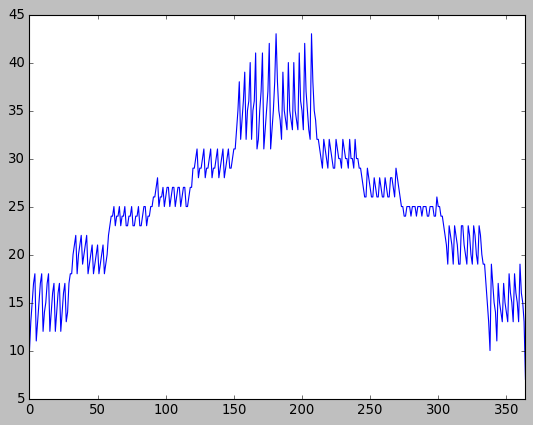

In [20]:
# Since we have a datetime index, df.Sales.plot()
df.Sales.plot()

In [21]:
df.corr()

,Temperature,Rainfall,Flyers,Price,Sales
Temperature,1.000000,-0.902859,0.797719,NaN,0.989832
Rainfall,-0.902859,1.000000,-0.747389,NaN,-0.909214
Flyers,0.797719,-0.747389,1.000000,NaN,0.805183
Price,NaN,NaN,NaN,NaN,NaN
Sales,0.989832,-0.909214,0.805183,NaN,1.000000


In [22]:
df["LogRainfall"] = df.Rainfall.apply(np.log)

In [23]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,LogRainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.693147
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.285179
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.285179
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.048790
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.000000


In [24]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,LogRainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.693147
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.285179
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.285179
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.048790
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.000000


In [25]:
X = df[["LogRainfall", "Temperature", "Flyers"]]
y = df[["Sales"]] # setup this way b/c 

In [26]:
# Normalize
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

In [29]:
# Create the linear model
lm = LinearRegression().fit(X_scaled, y_scaled)
normalized = dict(zip(X.columns, lm.coef_[0])) # [0] notation is here because of how "y" was setup with a matrix not a series

lm2 = LinearRegression().fit(X, y)
non_normalized = dict(zip(X.columns, lm2.coef_[0])) # [0] notation is here because of how "y" was setup with a matrix not a series

In [30]:
print("Normalized:")
print(pd.Series(normalized))
print()
print("Non-normalized:")
print(pd.Series(non_normalized))

Normalized:
LogRainfall   -0.275123
Temperature    0.758714
Flyers         0.026915
dtype: float64

Non-normalized:
LogRainfall   -5.926129
Temperature    0.311090
Flyers         0.013647
dtype: float64


## Lessons Learned
- Number of Flyers correlates, but each new flyer doesn't contribute to the # Sales, when we hold other things constant
- Holding LogRainfall and Flyers constant, a one point increase in temperature leads to 0.75 increase in sales. BUT these are normalized units
- Holding LogRainfall and Temperature constant, a one point increase in Flyers leads to a ~.0269 increase in sales (normalized)
- Holding LogRainfall and Temperature constant, a one point increase in Flyers leads to a ~.013 increase in sales (non-normalized)